In [1]:
import pandas as pd

In [2]:
#loading dataset using pandas library
df = pd.read_csv("cleanned.csv")

In [3]:
#printing first five rows of dataset
print(df.head())

   age     sex              cp  trestbps   chol    fbs         restecg  \
0   63    Male  typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male    asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male    asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male     non-anginal     130.0  250.0  False          normal   
4   41  Female  typical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak  num  
0   150.0  False      2.3    0  
1   108.0   True      1.5    2  
2   129.0   True      2.6    1  
3   187.0  False      3.5    0  
4   172.0  False      1.4    0  


In [4]:
#df.shape gives us rows and columns of data
df.shape

(918, 11)

In [5]:
#to check column names and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    float64
 4   chol      918 non-null    float64
 5   fbs       918 non-null    bool   
 6   restecg   918 non-null    object 
 7   thalch    918 non-null    float64
 8   exang     918 non-null    bool   
 9   oldpeak   918 non-null    float64
 10  num       918 non-null    int64  
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 66.5+ KB


In [6]:
#it gives us total count of missing values in data frame
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

In [7]:
# df.describe gives the statistical summary of dataframe
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,918.000000,918.000000,918.000000,918.000000,918.00000,918.000000
mean,53.510893,132.141612,199.862745,137.689542,0.85512,0.995643
std,9.432617,17.924706,109.154522,25.153455,1.05845,1.142985
min,28.000000,80.000000,0.000000,60.000000,-2.60000,0.000000
25%,47.000000,120.000000,177.250000,120.000000,0.00000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.50000,1.000000
75%,60.000000,140.000000,267.000000,155.750000,1.50000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.20000,4.000000


In [8]:
# it tells us how many times unique value occur in dataset
df['num'].value_counts()
# 0---> no heart diseases
# 1---> mild/ early stage heart disease 
# 2,3,4 progressivly more severe stages of heart diseases


num
0    410
1    265
2    108
3    107
4     28
Name: count, dtype: int64

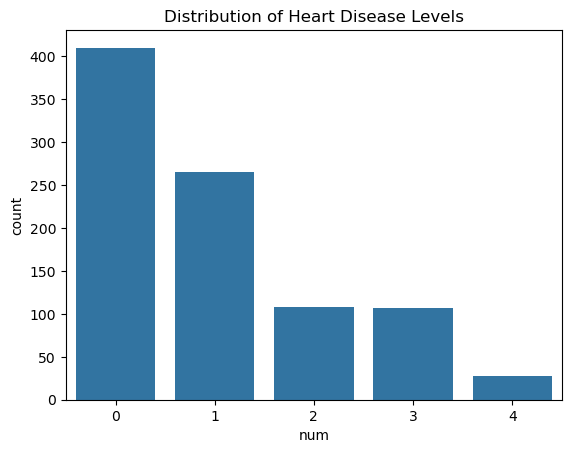

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='num', data=df)
plt.title("Distribution of Heart Disease Levels")
plt.show()
#we plot bar chat to know the number of patient in each cateogry of heart disease
# almost more than 400 people belong to "0 cateogry" it means majority patients donont have heart disease
#fewest people occur in catoegory 4 it means that very less number of people have severe heart disease



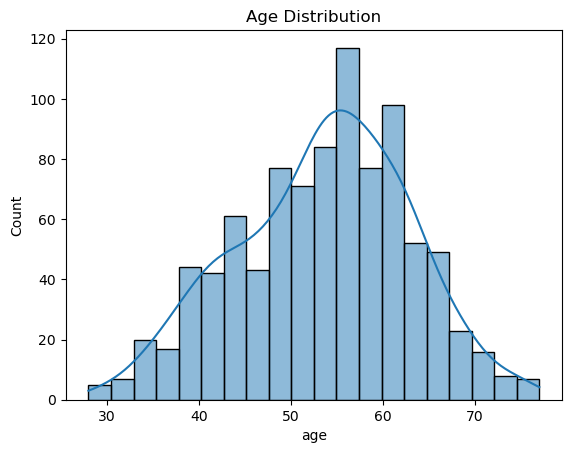

In [11]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()
# This graph shows the age disribution of people
# We can analyze that majority people in age range 50-60 years suffer from heart diseases


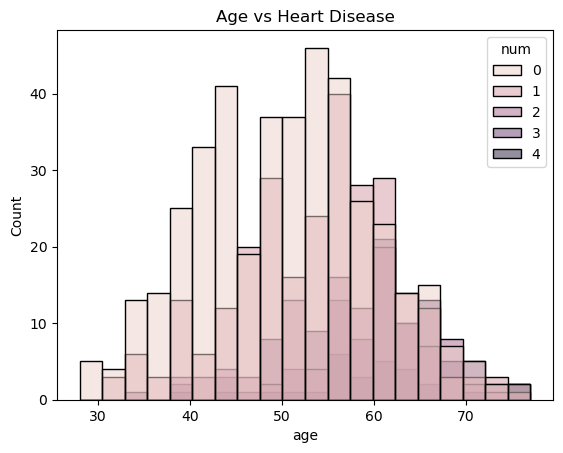

In [12]:
sns.histplot(data=df, x='age', hue='num', bins=20)
plt.title("Age vs Heart Disease")
plt.show()
# we plot graph to analyze relation between age and heart diseases
# we can analyze that people having age greater than 50 years suffer more from heart diseases

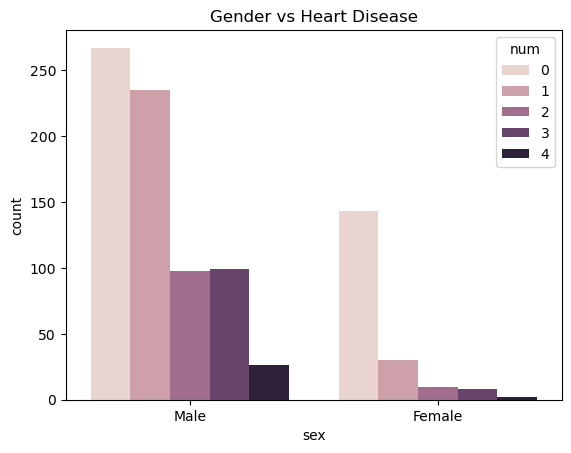

In [13]:
sns.countplot(x='sex', hue='num', data=df)
plt.title("Gender vs Heart Disease")
plt.show()
# This graph shows the relationship between gender and heart disease
# we can conclude being male there is high risk of suffering from heart diseses

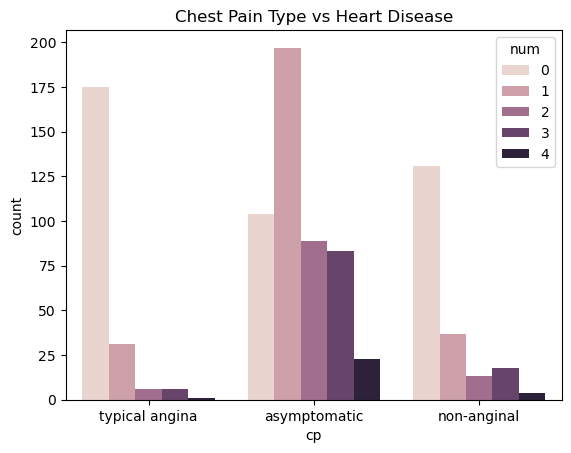

In [14]:
sns.countplot(x='cp', hue='num', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()
#The graph ahows relationship between chest pain and heasrt diseases
# The patient suffering from asymptomatic cp have more likely to suffer from heart diseases 

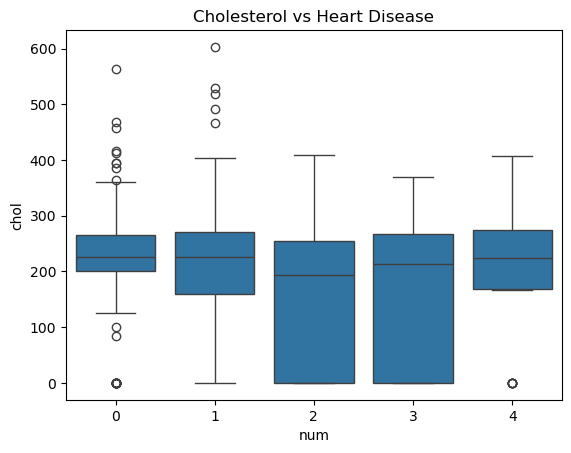

In [15]:
sns.boxplot(x='num', y='chol', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()
#Relationship of cholestrol level with heart disease

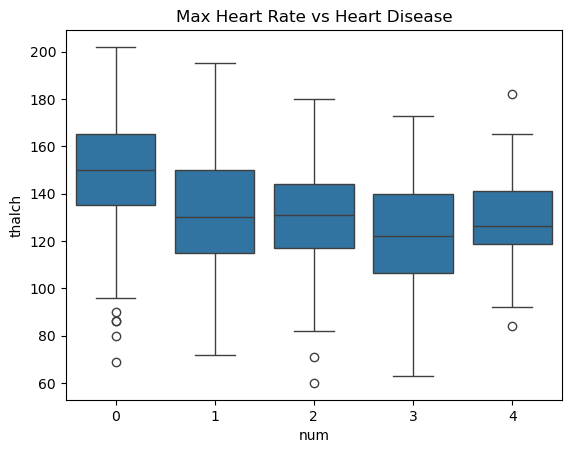

In [16]:
sns.boxplot(x='num', y='thalch', data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()
#The below graph shows relationship between maximum heart rate and heart diseases

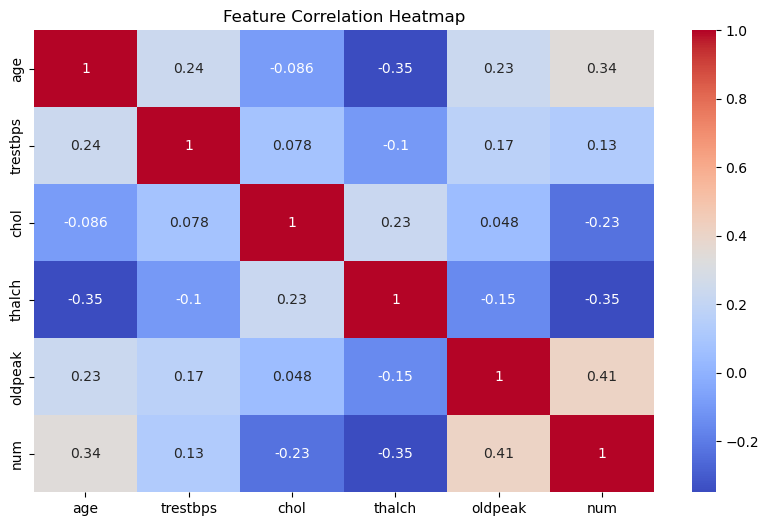

In [17]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
#Correlation heatmap shows how features are related to heart disease

In [18]:
#Encoding categorical features 1 for male and 0 for female
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Defining age,sex,trestbps,chol ,thalch and oldpeak as input features
X = df[['age', 'sex', 'trestbps', 'chol', 'thalch', 'oldpeak']]

#The target feature is num It is 1 for no disease(num=0) and 1 for other cases(num=1,2,3,4)
y = df['num'].apply(lambda x: 1 if x > 0 else 0)


In [19]:
## Splitting into test,train
from sklearn.model_selection import train_test_split
#Test, train and split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [20]:
# Feature scaling
# We do feature scaling to bring numerical feaures into same range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
# Create model
#We apply logistic regression as it is used for binary classification
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#The accuracy of model is 76% so the model is correct overall

Accuracy: 0.7608695652173914


In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

## 85--> true negative (patient who dont have heart disease are predicted accurately)
##34---> false positive (patient who donot have heart disease are predicted wrong)
##32---> false negative (patient have heart disease and model preidcted no disease)
#125---> True Positives (patient have heart disease and model predicted disease)

[[ 85  34]
 [ 32 125]]


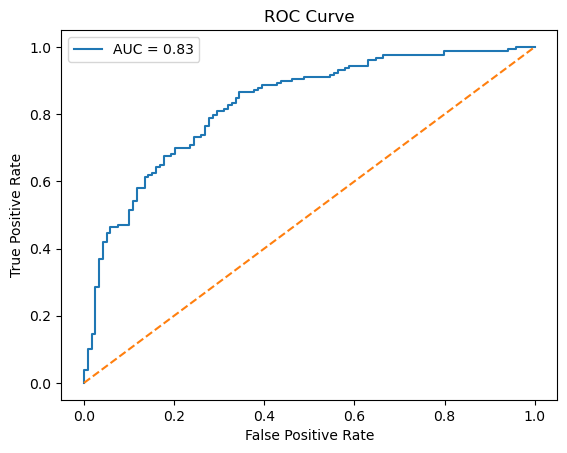

In [24]:
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
# When AUC = 0.83 means:
#There is an 83% chance that the model will correctly distinguish between a patient with heart disease and one without it.
#The ROC curve evaluates the classification performance of the Logistic Regression model. The model achieved an AUC score of 0.83, 
#indicating a strong ability to distinguish between patients with and without heart disease.
